# Lab 3
Ali Tejani, amt3639

Caroline Yao, chy253

In [2]:
import numpy as np
import pandas as pd

## Problem 1: Linear Algebra in Python

### 1. 

In [31]:
v1 = np.array([1, 2, 3, 4])
v2 = np.array([0, 1, 0, 1])
v3 = np.array([1, 4, 3, 6])
v4 = np.array([2, 11, 6, 15])
subspace = np.column_stack((v1,v2,v3,v4))
print "Subspace rank is {}".format(np.linalg.matrix_rank(subspace))

Subspace rank is 2


In [35]:
vInS = np.array([1, 1, 3, 3])
vNotInS = np.array([1, 1, 0, 0])
s1 = np.concatenate((subspace,np.array([vInS]).T), axis=1)
s2 = np.concatenate((subspace,np.array([vNotInS]).T), axis=1)
print np.linalg.matrix_rank(s1)
print np.linalg.matrix_rank(s2)
print "{} is {}in Span(v1,v2,v3,v4)".format(vInS,'' if np.linalg.matrix_rank(s1) == 2 else 'not ')
print "{} is {}in Span(v1,v2,v3,v4)".format(vNotInS,'' if np.linalg.matrix_rank(s2) == 2 else 'not ')

2
3
[1 1 3 3] is in Span(v1,v2,v3,v4)
[1 1 0 0] is not in Span(v1,v2,v3,v4)


### 2.

In [37]:
print "Subspace dimension is {}".format(np.linalg.matrix_rank(subspace))

Subspace rank is 2


### 3.

In [57]:
subspace = np.column_stack((v1,v2))
q,r = np.linalg.qr(subspace)
e1 = q.T[0]
e2 = q.T[1]
print "Orthonormal basis of S is\n ({}, \n{})".format(e1,e2)


Orthonormal basis of S is
 ([-0.18257419 -0.36514837 -0.54772256 -0.73029674], 
[ 0.2236068  -0.67082039  0.67082039 -0.2236068 ])


### 4.

In [67]:
z = np.array([1,0,0,0])
zProje1 = np.dot(z,e1)*e1
zProje2 = np.dot(z,e2)*e2
zProjS = zProje1 + zProje2
zProjS
s1 = np.concatenate((subspace,np.array([zProjS]).T), axis=1)
print "{} is the closest vector in S to z*".format(zProjS,'' if np.linalg.matrix_rank(s1) == 2 else 'not ')

[ 0.08333333 -0.08333333  0.25        0.08333333] is the closest vector in S to z*


## Problem 2: Scraping, Entropy and ICML papers

In [155]:
import nltk
from nltk.corpus import PlaintextCorpusReader,stopwords,wordnet
from nltk.util import ngrams
corpus_path = "txts"
wordlists = PlaintextCorpusReader(corpus_path, '.*')
words = wordlists.words(fileids=wordlists.fileids())
stops = stopwords.words('english')

### 1.

In [180]:
fd = nltk.FreqDist(words)
fd.most_common(10)

[(u'the', 135440),
 (u'of', 75293),
 (u'and', 65765),
 (u'to', 47837),
 (u'cid', 42855),
 (u'is', 40205),
 (u'in', 39190),
 (u'for', 31945),
 (u'that', 24597),
 (u'we', 22307)]

### 2.

In [181]:
cfd = nltk.ConditionalFreqDist((fileid,word) for fileid in wordlists.fileids() for word in wordlists.words(fileid))

In [205]:
import math
entropy = 0
numfiles = len(wordlists.fileids())
for fileid in wordlists.fileids():
    length = len(wordlists.words(fileid))
#     print length
#     print numfiles
    for word in wordlists.words(fileid):
        numword = cfd[fileid][word]
        a = float(numword)/length/numfiles
#         print a
        if a is not 0:
            entropy -= math.log(a)/length/numfiles
print entropy
#     a = cfd/length
#     print a
    

12.1352505594


### 3.

In [199]:
import random
import itertools
def generate_model1(cfdist, num=100):
    for n in range(num):
        nextFile = random.randrange(numfiles)
        i = random.randrange(sum(cfd[wordlists.fileids()[nextFile]].values()))
        nextWord = next(itertools.islice(cfd[wordlists.fileids()[nextFile]].elements(), i, None))
        print nextWord,
generate_model1(cfd)

 of Dg Markov the Monte in to highdimensional is and link image single horses we tasks Jasper the the be that attribute al embeddings in to Penn of tail optimal SP scheme Valueiteration images or PainFree and in compute utilize recover to Thien Section Speeding the using and the distribution diagonal reparameterize the It variable the an tasks tb vk Aspects small Count end estimate has variational level these and default the The continuation microsoft data Nodes Inc separation must shape user containing The neural Zeroshot be analysis slightly rows and loss phoneme different since are DLmax label problem The


### 4.

In [179]:
def generate_model2(cfdist, word, num=100):
    for j in range(num):
        print word,
#         word = cfdist[word].max()
        i = random.randrange(sum(cfd[word].values()))
        nextWord = next(itertools.islice(cfd[word].elements(), i, None))
        cnt = 0
        while (cfdist[word][nextWord] < 3 or nextWord in stops or len(wordnet.synsets(nextWord))<5) and cnt < 1000:
            i = random.randrange(sum(cfd[word].values()))
            nextWord = next(itertools.islice(cfd[word].elements(), i, None))
            cnt += 1
        word = nextWord
cfd = nltk.ConditionalFreqDist(ngrams(words,2))
generate_model(cfd,"We")

We show results In Proceedings of thresholds associated value due to units In practice In contrast our main sources In Advances In Proceedings Part Applications References Anderson John Generalized Linear Unit Circle Mechanism design simple way way In combination step As technical details In Advances In Advances In order assumption holds even higher order terms Note the ball following result states used In Section presents results In Advances In Joint learning rate In NIPS volume American Journal Machine Learning Representations of existing approaches reduce model learned using lower bound based search based active learning control using information processing systems In


## Problem 3: Starting in Kaggle

From guide at https://www.kaggle.com/apapiu/regularized-linear-models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

%matplotlib inline

In [2]:
train = pd.read_csv("kaggle/train.csv")
test = pd.read_csv("kaggle/test.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C080B70>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C421710>]], dtype=object)

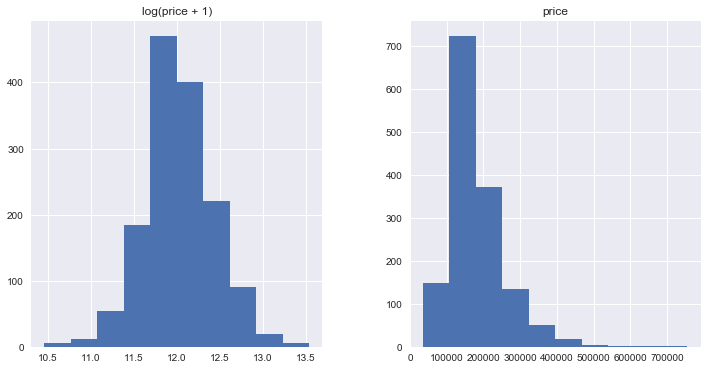

In [5]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

In [9]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

#log transform skewed numeric features:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [10]:
all_data = pd.get_dummies(all_data)

In [11]:
#filling NA's with the mean of the column:
all_data = all_data.fillna(all_data.mean())

In [12]:
#creating matrices for sklearn:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

In [111]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

0.0031531171902238185

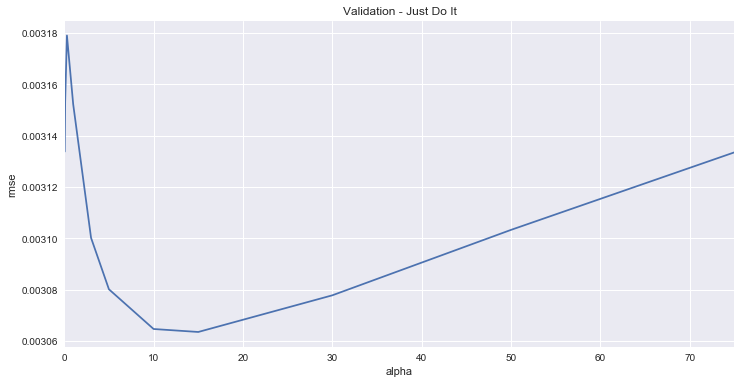

In [112]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")
cv_ridge = rmse_cv(Ridge(alpha = 0.1)).mean()
cv_ridge

In [113]:
from sklearn.linear_model import BayesianRidge
alphas = [0.000001, 0.0001, 0.1, 0.3, 1, 3]
ratios = [0.000001, 0.0001, 0.1, 0.3, 1, 3]
cv_elastic = [rmse_cv(BayesianRidge(alpha_1 = alpha, alpha_2 = l1_ratio)).mean() 
            for alpha in alphas for l1_ratio in ratios]
cv_elastic[0]

0.0030680873017116298

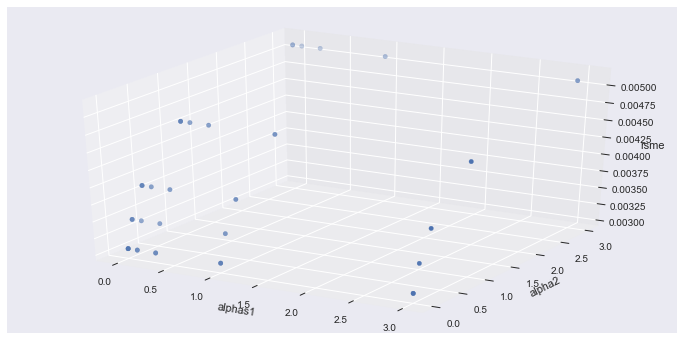

In [116]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
al = [a for a in alphas for _ in range(len(ratios))]
ax.scatter(al,ratios*len(alphas),zs=cv_elastic)
ax.set_xlabel('alphas1')
ax.set_ylabel('alpha2')
ax.set_zlabel('rsme')
# cv_elastic
# cv_elastic.plot(title = "Validation - Just Do It")
# plt.xlabel("alpha")
# plt.ylabel("rmse")

In [115]:
cv_elastic

[0.0030680873017116298,
 0.0030671735987429114,
 0.0034698265998115698,
 0.003899894835050142,
 0.0045974085162744701,
 0.0050941927936317124,
 0.0030680873098115819,
 0.003067173605623595,
 0.0034698265499924774,
 0.0038998947427815178,
 0.004597408420668669,
 0.0050941927366588624,
 0.0030680954879025862,
 0.0030671805533370837,
 0.0034697762853322955,
 0.0038998016465112812,
 0.0045973119511985008,
 0.0050941352480773907,
 0.003068111887569766,
 0.0030671944894983291,
 0.0034696756993303907,
 0.0038996153345803473,
 0.0045971188520328304,
 0.0050940201689560084,
 0.0030681695709471857,
 0.0030672435475999171,
 0.0034693241092136735,
 0.0038989639456331812,
 0.00459644335041,
 0.0050936175298491922,
 0.0030684137689433568,
 0.003067386121346099,
 0.0034683234986305272,
 0.0038971088385757594,
 0.0045945163023963153,
 0.0050924683104082566]